In [2]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature


/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_56803/585130713.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
stations = pd.read_csv('isd-history.csv')

In [4]:
tw_stations = stations.loc[stations.CTRY=='TW']

In [5]:
cur_tw_stations = tw_stations.loc[tw_stations.END>=20000000]

In [6]:
cur_tw_stations

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
10341,466860,99999,CHIANG KAI SHEK INTL,TW,NaN,RCTP,25.078,121.233,32.6,19790301,20240205
10343,466888,99999,BEIGAN,TW,NaN,RCMT,26.224,120.003,12.5,19990114,20001231
10349,466960,99999,SUNGSHAN,TW,NaN,RCSS,25.069,121.552,5.5,19461231,20240205
10360,467400,99999,KAOHSIUNG INTL,TW,NaN,RCKH,22.577,120.350,7.9,19730101,20240205
10361,467403,99999,FENGNIN,TW,NaN,RCFN,22.755,121.102,43.6,19820603,20240205
10364,467430,99999,TAINAN,TW,NaN,RCNN,22.950,120.206,19.2,19471231,20240205
10390,467700,99999,CHING CHUAN KANG AB,TW,NaN,RCMQ,24.265,120.621,202.1,19520331,20240205
12681,593540,99999,CHIA-YI,TW,NaN,NaN,23.467,120.383,25.0,19560820,20020131
12707,595580,99999,HENG CHUN ARPT,TW,NaN,NaN,22.033,120.733,13.0,19730101,20011205
12712,595680,99999,ORCHID ISL.,TW,NaN,NaN,22.033,121.550,10.0,19731115,20020526


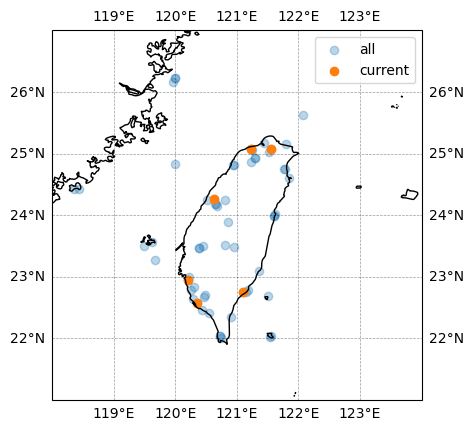

In [55]:


ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(tw_stations.LON, tw_stations.LAT, alpha=0.3)
ax.scatter(cur_tw_stations.LON, cur_tw_stations.LAT)

# plot_ax.set_global()
ax.set_extent((118,124,21,27))
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',
                  linestyle='--')
ax.legend(['all', 'current'])

In [152]:
taidong_st = pd.read_csv('59562099999.csv')

In [216]:
taidong_st.keys()

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AY1', 'AY2', 'GA1', 'GA2',
       'GA3', 'GE1', 'GF1', 'MA1', 'MD1', 'MW1', 'REM', 'EQD'],
      dtype='object')

In [238]:
def extract_wms(x):
    if type(x)==str:
        if float(x.split(',')[3]) == 9999: return np.nan
        else: return float(x.split(',')[3])
    else: return np.nan

<Axes: >

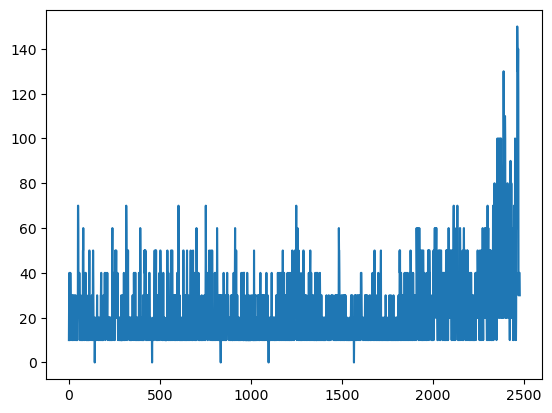

In [239]:
taidong_st.WND.map(extract_wms).plot()

In [ ]:
taidong_st.WND

In [154]:
mm = taidong_st.AA1.map(extract_mm)

In [155]:
other_st_dat = pd.read_csv('59358099999.csv')

In [165]:
other_st_dat

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GA1,GA2,GA3,GE1,GF1,MA1,MD1,MW1,REM,EQD
0,59358099999,2020-01-01T00:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"04,1,+01250,1,06,1","99,9,+99999,9,03,1",NaN,"9,MSL ,+99999,+99999","06,99,1,04,1,99,9,01250,1,99,9,99,9","99999,9,10237,1","2,1,020,1,+999,9",NaN,SYN004BUFR,NaN
1,59358099999,2020-01-01T03:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"06,1,+02600,1,03,1",NaN,NaN,"9,MSL ,+99999,+99999","06,99,1,06,1,99,9,02600,1,99,9,99,9","99999,9,10239,1","0,1,002,1,+999,9",NaN,SYN004BUFR,NaN
2,59358099999,2020-01-01T06:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"01,1,+02600,1,03,1",NaN,NaN,"9,MSL ,+99999,+99999","01,99,1,01,1,99,9,02600,1,99,9,99,9","99999,9,10211,1","7,1,028,1,+999,9",NaN,SYN004BUFR,NaN
3,59358099999,2020-01-01T09:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,"00,99,1,99,9,99,9,99999,9,99,9,99,9","99999,9,10211,1","4,1,000,1,+999,9",NaN,SYN004BUFR,NaN
4,59358099999,2020-01-01T12:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,"00,99,1,99,9,99,9,99999,9,99,9,99,9","99999,9,10219,1","3,1,008,1,+999,9",NaN,SYN004BUFR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,59358099999,2020-12-31T09:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"08,1,+02600,1,03,1","99,9,+99999,9,10,1",NaN,"9,MSL ,+99999,+99999","08,99,1,08,1,99,9,02600,1,99,9,99,9","99999,9,10199,1","3,1,004,1,+999,9",NaN,SYN004BUFR,NaN
2817,59358099999,2020-12-31T12:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"07,1,+01250,1,06,1","99,9,+99999,9,10,1","99,9,+99999,9,10,1","9,MSL ,+99999,+99999","07,99,1,07,1,99,9,01250,1,99,9,99,9","99999,9,10215,1","1,1,016,1,+999,9",NaN,SYN004BUFR,NaN
2818,59358099999,2020-12-31T15:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"07,1,+01250,1,06,1","99,9,+99999,9,10,1","99,9,+99999,9,10,1","9,MSL ,+99999,+99999","07,99,1,07,1,99,9,01250,1,99,9,99,9","99999,9,10216,1","0,1,001,1,+999,9",NaN,SYN004BUFR,NaN
2819,59358099999,2020-12-31T18:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"07,1,+02600,1,03,1","99,9,+99999,9,10,1",NaN,"9,MSL ,+99999,+99999","07,99,1,07,1,99,9,02600,1,99,9,99,9","99999,9,10211,1","8,1,005,1,+999,9",NaN,SYN004BUFR,NaN


In [110]:
other_st_dat.AA1[0].split(',')

['06', '9999', '9', '9']

In [156]:
def extract_mm(x):
    if type(x)==str:
        return float(x.split(',')[1])
    else: return np.nan

In [157]:
mm_o = other_st_dat.AA1.map(extract_mm)

Text(0, 0.5, 'precip [mm]')

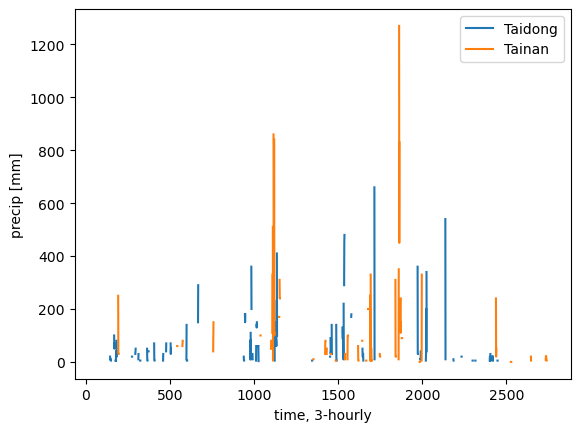

In [218]:
mm.where((mm!=9999) & (mm!=0)).plot()
mm_o.where(mm_o!=9999).plot()
plt.legend(['Taidong','Tainan'])
plt.xlabel('time, 3-hourly')
plt.ylabel('precip [mm]')

In [222]:
def extract_t(x):
    if type(x)==str:
        return float(x.split(',')[0])
    else: return np.nan

<Axes: >

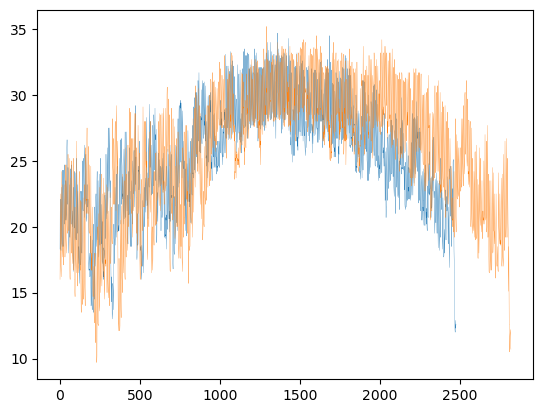

In [230]:
(taidong_st.TMP.map(extract_t)/10).plot(linewidth=0.2)
(other_st_dat.TMP.map(extract_t)/10).plot(linewidth=0.2)

In [ ]:
taidong_st.TMP

In [176]:
mm_o.where(mm_o==9999).isna().sum()

308

In [173]:
mm.where((mm==9999) | (mm==0)).isna().sum()

473

In [179]:
473/2478

0.19087974172719935

In [181]:
other_st_dat

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GA1,GA2,GA3,GE1,GF1,MA1,MD1,MW1,REM,EQD
0,59358099999,2020-01-01T00:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"04,1,+01250,1,06,1","99,9,+99999,9,03,1",NaN,"9,MSL ,+99999,+99999","06,99,1,04,1,99,9,01250,1,99,9,99,9","99999,9,10237,1","2,1,020,1,+999,9",NaN,SYN004BUFR,NaN
1,59358099999,2020-01-01T03:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"06,1,+02600,1,03,1",NaN,NaN,"9,MSL ,+99999,+99999","06,99,1,06,1,99,9,02600,1,99,9,99,9","99999,9,10239,1","0,1,002,1,+999,9",NaN,SYN004BUFR,NaN
2,59358099999,2020-01-01T06:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"01,1,+02600,1,03,1",NaN,NaN,"9,MSL ,+99999,+99999","01,99,1,01,1,99,9,02600,1,99,9,99,9","99999,9,10211,1","7,1,028,1,+999,9",NaN,SYN004BUFR,NaN
3,59358099999,2020-01-01T09:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,"00,99,1,99,9,99,9,99999,9,99,9,99,9","99999,9,10211,1","4,1,000,1,+999,9",NaN,SYN004BUFR,NaN
4,59358099999,2020-01-01T12:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,"00,99,1,99,9,99,9,99999,9,99,9,99,9","99999,9,10219,1","3,1,008,1,+999,9",NaN,SYN004BUFR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,59358099999,2020-12-31T09:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"08,1,+02600,1,03,1","99,9,+99999,9,10,1",NaN,"9,MSL ,+99999,+99999","08,99,1,08,1,99,9,02600,1,99,9,99,9","99999,9,10199,1","3,1,004,1,+999,9",NaN,SYN004BUFR,NaN
2817,59358099999,2020-12-31T12:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"07,1,+01250,1,06,1","99,9,+99999,9,10,1","99,9,+99999,9,10,1","9,MSL ,+99999,+99999","07,99,1,07,1,99,9,01250,1,99,9,99,9","99999,9,10215,1","1,1,016,1,+999,9",NaN,SYN004BUFR,NaN
2818,59358099999,2020-12-31T15:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"07,1,+01250,1,06,1","99,9,+99999,9,10,1","99,9,+99999,9,10,1","9,MSL ,+99999,+99999","07,99,1,07,1,99,9,01250,1,99,9,99,9","99999,9,10216,1","0,1,001,1,+999,9",NaN,SYN004BUFR,NaN
2819,59358099999,2020-12-31T18:00:00,4,23.0,120.216667,14.0,"TAINAN, CH",FM-12,99999,V020,...,"07,1,+02600,1,03,1","99,9,+99999,9,10,1",NaN,"9,MSL ,+99999,+99999","07,99,1,07,1,99,9,02600,1,99,9,99,9","99999,9,10211,1","8,1,005,1,+999,9",NaN,SYN004BUFR,NaN


In [9]:
us_stations = stations.loc[stations.CTRY=='US']

In [10]:
cur_us_stations = us_stations.loc[us_stations.END>=20200000]

In [11]:
cur_us_stations

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
14528,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.294,-116.147,610.5,19900102,20240206
15136,700001,26492,PORTAGE GLACIER,US,AK,PATO,60.784,-148.848,32.5,20060101,20240206
15138,700197,26558,SELAWIK,US,AK,PASK,66.600,-159.986,7.6,20060101,20240206
15140,700260,27502,W POST-WILL ROGERS MEMORIAL AIRPORT,US,AK,PABR,71.287,-156.739,8.1,19450101,20240206
15144,700300,27503,WAINWRIGHT AIRPORT,US,AK,PAWI,70.637,-160.013,12.5,19991102,20240203
...,...,...,...,...,...,...,...,...,...,...,...
29635,A07355,241,VIROQUA MUNICIPAL AIRPORT,US,WI,KY51,43.579,-90.913,394.1,20140731,20240206
29636,A07357,182,ELBOW LAKE MUNICIPAL PRIDE OF THE PRAIRIE AIRPORT,US,MN,KY63,45.986,-95.992,367.3,20140731,20240206
29637,A07359,240,IONIA COUNTY AIRPORT,US,MI,KY70,42.938,-85.061,249.0,20140731,20240206
29638,A51255,445,DEMOPOLIS MUNICIPAL AIRPORT,US,AL,KDYA,32.464,-87.954,34.1,20140731,20240206


In [12]:
cur_us_stations.loc[cur_us_stations.STATE=="OK"]

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
17157,720255,99999,MIAMI MUNI,US,OK,KMIO,36.909,-94.888,246.3,20190828,20230917
17300,720342,53947,WATONGA AIRPORT,US,OK,KJWG,35.864,-98.421,471.8,20060101,20240207
17318,720354,63901,ALTUS/QUARTZ MOUNTAIN REGIONAL AIRPORT,US,OK,KAXS,34.699,-99.338,436.8,20050524,20240206
17321,720356,13999,CLINTON REGIONAL AIRPORT,US,OK,KCLK,35.538,-98.933,492.6,20050611,20240207
17322,720357,53993,CUSHING MUNICIPAL AIRPORT,US,OK,KCUH,35.950,-96.773,279.2,20060101,20240207
17324,720358,53999,EL RENO REGIONAL AIRPORT,US,OK,KRQO,35.473,-98.006,431.9,20050817,20240206
17325,720359,23902,SEMINOLE MUNICIPAL AIRPORT,US,OK,KSRE,35.275,-96.675,312.1,20050611,20240207
17499,720558,3977,ELK CITY MUNICIPAL AP,US,OK,KELK,35.433,-99.400,610.2,20140530,20240207
17500,720559,172,STAN STAMPER MUNICIPAL AIRPORT,US,OK,KHHW,34.033,-95.533,174.0,20120202,20240206
17501,720561,467,WILLIAM R POUGE MUNICIPAL AIRPORT,US,OK,KOWP,36.175,-96.152,272.2,20130822,20240206


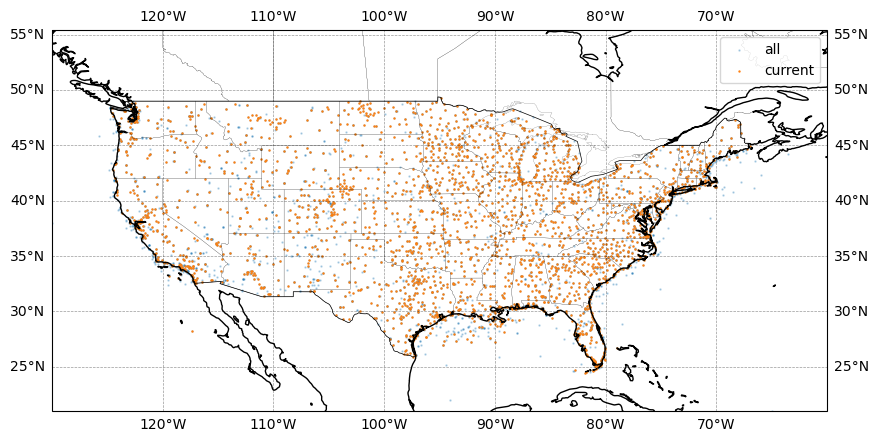

In [34]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(us_stations.LON, us_stations.LAT, alpha=0.3, s = 0.5)
ax.scatter(cur_us_stations.LON, cur_us_stations.LAT, s = 0.5)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.1)

# plot_ax.set_global()
ax.set_extent((-130,-60,21,50))
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',
                  linestyle='--')
ax.legend(['all', 'current'])
plt.savefig('us_stat.pdf', format="pdf")

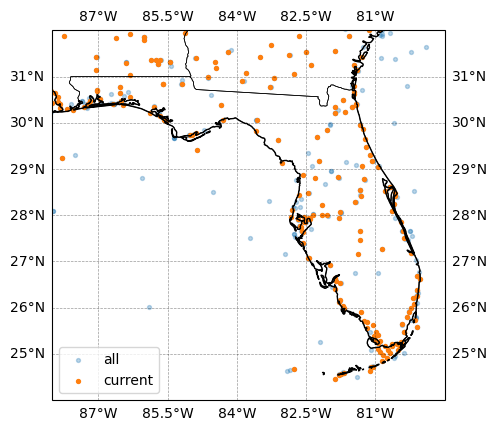

In [210]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(us_stations.LON, us_stations.LAT, alpha=0.3, s=8)
ax.scatter(cur_us_stations.LON, cur_us_stations.LAT, s=8)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)

# plot_ax.set_global()
ax.set_extent((-88,-79.5,24,32))
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',
                  linestyle='--')
ax.legend(['all', 'current'])

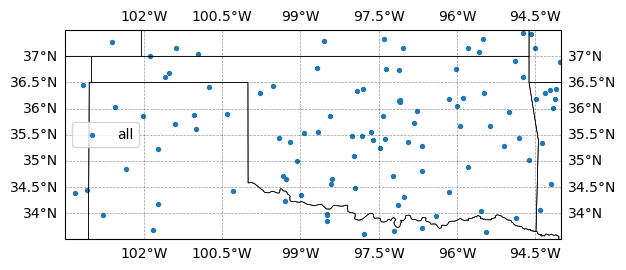

In [26]:
okstat = cur_us_stations#.loc[cur_us_stations.STATE=="OK"]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# ax.scatter(us_stations.LON, us_stations.LAT, alpha=0.3, s=8)
ax.scatter(okstat.LON, okstat.LAT, s=8)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)

# plot_ax.set_global()
ax.set_extent((-103.5,-94,33.5,37.5))
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',
                  linestyle='--')
ax.legend(['all', 'current'])

In [23]:
len(cur_us_stations.loc[cur_us_stations.STATE=="OK"])

58

In [25]:
500 / 3

166.66666666666666

In [28]:
60/128/128

0.003662109375

In [ ]:
okstat = cur_us_stations#.loc[cur_us_stations.STATE=="OK"]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# ax.scatter(us_stations.LON, us_stations.LAT, alpha=0.3, s=8)
ax.scatter(okstat.LON, okstat.LAT, s=8)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)

# plot_ax.set_global()
ax.set_extent((-103.5,-94,33.5,37.5))
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',
                  linestyle='--')
ax.legend(['all', 'current'])

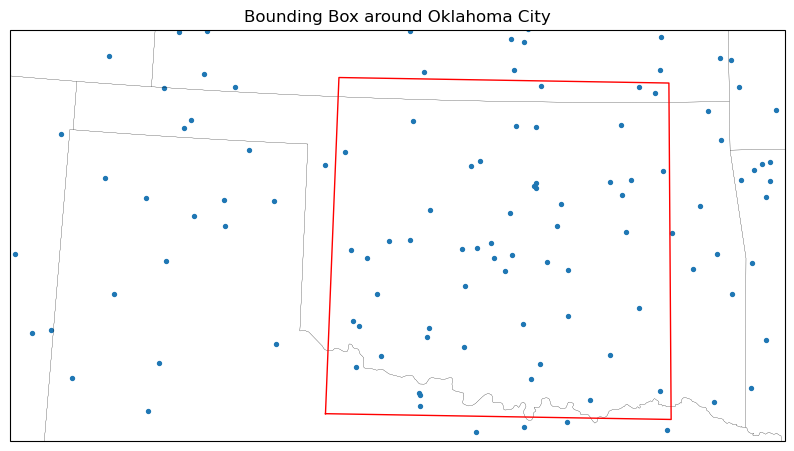

In [72]:
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def bounding_box(center_lat, center_lon, width, height):
    """
    Calculate the latitude and longitude coordinates of a bounding box
    given the center coordinates and the width and height of the box.
    
    Parameters:
    center_lat (float): Latitude of the center point in degrees.
    center_lon (float): Longitude of the center point in degrees.
    width (float): Width of the bounding box in kilometers.
    height (float): Height of the bounding box in kilometers.
    
    Returns:
    tuple: (min_lat, max_lat, min_lon, max_lon) of the bounding box in degrees.
    """
    # Convert width and height to degrees (approximation)
    width_deg = width / (111.0 * math.cos(math.radians(center_lat)))
    height_deg = height / 111.0
    
    # Calculate bounding box coordinates
    min_lat = center_lat - (height_deg / 2)
    max_lat = center_lat + (height_deg / 2)
    min_lon = center_lon - (width_deg / 2)
    max_lon = center_lon + (width_deg / 2)
    
    return min_lat, max_lat, min_lon, max_lon

# Center coordinates of Oklahoma City
okc_lat = 35.4676
okc_lon = -97.5164

# Width and height of the frame (128 by 128 at 3km resolution)
frame_width = 128 * 3  # in kilometers
frame_height = 128 * 3  # in kilometers

# Calculate bounding box coordinates
min_lat, max_lat, min_lon, max_lon = bounding_box(okc_lat, okc_lon, frame_width, frame_height)

def plot_bounding_box(min_lat, max_lat, min_lon, max_lon):
    """
    Plot the bounding box on a Cartopy map.
    
    Parameters:
    min_lat (float): Minimum latitude of the bounding box in degrees.
    max_lat (float): Maximum latitude of the bounding box in degrees.
    min_lon (float): Minimum longitude of the bounding box in degrees.
    max_lon (float): Maximum longitude of the bounding box in degrees.
    """
    # Create a Cartopy map with a Lambert Conformal projection centered on the USA
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

    # Plot the bounding box
    ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon], 
            [min_lat, min_lat, max_lat, max_lat, min_lat], 
            color='red', linewidth=1, marker='', transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.1)

    # Add coastlines and a title
    ax.coastlines()
    ax.set_title('Bounding Box around Oklahoma City')
    ax.scatter(okstat.LON, okstat.LAT, s=8,  transform=ccrs.PlateCarree())

    # Set extent of the map to show a larger part of the USA
    ax.set_extent([-130, -60, 20, 50], crs=ccrs.PlateCarree())
    ax.set_extent((-103.5,-94,33.5,37.5))

    # Show the plot
    plt.show()

# Call the function to plot the bounding box
plot_bounding_box(min_lat, max_lat, min_lon, max_lon)


In [58]:
min_lat, max_lat, min_lon, max_lon = bounding_box(okc_lat, okc_lon, frame_width, frame_height)
print(min_lat, max_lat, min_lon, max_lon )

33.737870270270264 37.19732972972973 -99.64021725759747 -95.39258274240254


In [73]:
import pandas as pd

def is_inside_bbox(entry, min_lat, max_lat, min_lon, max_lon):
    """
    Check if a latitude and longitude entry falls inside a bounding box.
    
    Parameters:
    entry (pd.Series): Pandas Series containing 'latitude' and 'longitude' columns.
    min_lat (float): Minimum latitude of the bounding box in degrees.
    max_lat (float): Maximum latitude of the bounding box in degrees.
    min_lon (float): Minimum longitude of the bounding box in degrees.
    max_lon (float): Maximum longitude of the bounding box in degrees.
    
    Returns:
    bool: True if the entry is inside the bounding box, False otherwise.
    """
    lat = entry['LAT']
    lon = entry['LON']
    return min_lat <= lat <= max_lat and min_lon <= lon <= max_lon

# Example usage:
# Assuming 'df' is your pandas DataFrame containing latitude and longitude columns
df = pd.DataFrame({'latitude': [35.5, 36.5, 37.5],
                   'longitude': [-98.5, -99.5, -97.5]})

# # Define the bounding box coordinates
# min_lat = 35
# max_lat = 38
# min_lon = -100
# max_lon = -97

# Apply the function to check if entries are inside the bounding box
okstat['inside_bbox'] = okstat.apply(is_inside_bbox, args=(min_lat, max_lat, min_lon, max_lon), axis=1)



/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_9983/3695688412.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  okstat['inside_bbox'] = okstat.apply(is_inside_bbox, args=(min_lat, max_lat, min_lon, max_lon), axis=1)


In [74]:
okstat.inside_bbox.sum()

54

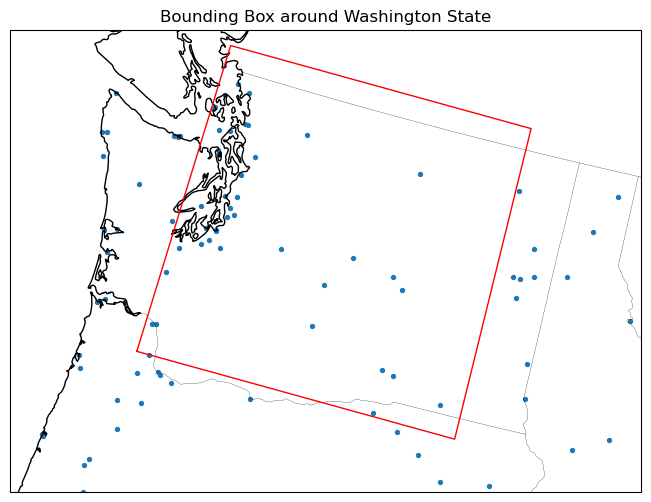

In [78]:
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def bounding_box(center_lat, center_lon, width, height):
    """
    Calculate the latitude and longitude coordinates of a bounding box
    given the center coordinates and the width and height of the box.
    
    Parameters:
    center_lat (float): Latitude of the center point in degrees.
    center_lon (float): Longitude of the center point in degrees.
    width (float): Width of the bounding box in kilometers.
    height (float): Height of the bounding box in kilometers.
    
    Returns:
    tuple: (min_lat, max_lat, min_lon, max_lon) of the bounding box in degrees.
    """
    # Convert width and height to degrees (approximation)
    width_deg = width / (111.0 * math.cos(math.radians(center_lat)))
    height_deg = height / 111.0
    
    # Calculate bounding box coordinates
    min_lat = center_lat - (height_deg / 2)
    max_lat = center_lat + (height_deg / 2)
    min_lon = center_lon - (width_deg / 2)
    max_lon = center_lon + (width_deg / 2)
    
    return min_lat, max_lat, min_lon, max_lon

# Center coordinates of Washington state
wa_lat = 47.5
wa_lon = -120.5

# Width and height of the frame (256 by 256 at 3km resolution)
frame_width = 128 * 3  # in kilometers
frame_height = 128 * 3  # in kilometers

# Calculate bounding box coordinates
min_lat, max_lat, min_lon, max_lon = bounding_box(wa_lat, wa_lon, frame_width, frame_height)

def plot_bounding_box(min_lat, max_lat, min_lon, max_lon):
    """
    Plot the bounding box on a Cartopy map.
    
    Parameters:
    min_lat (float): Minimum latitude of the bounding box in degrees.
    max_lat (float): Maximum latitude of the bounding box in degrees.
    min_lon (float): Minimum longitude of the bounding box in degrees.
    max_lon (float): Maximum longitude of the bounding box in degrees.
    """
    # Create a Cartopy map with a Lambert Conformal projection centered on the USA
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

    # Plot the bounding box
    ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon], 
            [min_lat, min_lat, max_lat, max_lat, min_lat], 
            color='red', linewidth=1, marker='', transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.1)
    ax.scatter(okstat.LON, okstat.LAT, s=8,  transform=ccrs.PlateCarree())

    # Add coastlines and a title
    ax.coastlines()
    ax.set_title('Bounding Box around Washington State')

    # Set extent of the map to zoom in on Washington state
    ax.set_extent([-125, -116, 45.5, 49], crs=ccrs.PlateCarree())

    # Show the plot
    plt.show()

# Call the function to plot the bounding box
plot_bounding_box(min_lat, max_lat, min_lon, max_lon)


In [4]:
path_to_isp = '/Users/pmanshausen/Documents/rain_gauges/data/3611864.csv'

In [5]:
stations = pd.read_csv(path_to_isp)

/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_56803/3940947570.py:1: DtypeWarning: Columns (0,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  stations = pd.read_csv(path_to_isp)


In [9]:
import numpy as np
def extract_gust_speed(x):
    if type(x)==str:
        if float(x.split(',')[0]) == 9999: return np.nan
        else: return float(x.split(',')[0])
    else: return np.nan

In [10]:
stations['gust'] = stations.OC1.map(extract_gust_speed)

In [13]:
stations['DATE'] = pd.to_datetime(stations.DATE)

In [14]:
stations_17 = stations.loc[stations.DATE.dt.year == 2017]

In [15]:
stations_17.dropna(subset = ['gust'], inplace=True)

/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/1643502930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_17.dropna(subset = ['gust'], inplace=True)


In [18]:
projection = ccrs.LambertConformal(central_longitude=262.5, 
                                   central_latitude=38.5, 
                                   standard_parallels=(38.5, 38.5),
                                    globe=ccrs.Globe(semimajor_axis=6371229,
                                                     semiminor_axis=6371229))
def lonlat_to_xy(projection, longitude, latitude):
    x, y = projection.transform_point(longitude, latitude, ccrs.PlateCarree())
    xmin = -2697520.142522
    x_dist = 3000.
    ymin = -1587306.152557
    y_dist = 3000.
    
    x = (x-xmin)/x_dist
    y = (y-ymin)/y_dist
    return x,y

def latlon_to_xy_wrapper(row):
    x, y = lonlat_to_xy(projection, row['LONGITUDE'], row['LATITUDE'])
    return x, y

# Apply the function to each row of the DataFrame
stations_17[['x', 'y']] = stations_17.apply(latlon_to_xy_wrapper, axis=1, result_type='expand')


/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/2462265107.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_17[['x', 'y']] = stations_17.apply(latlon_to_xy_wrapper, axis=1, result_type='expand')
/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/2462265107.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_17[['x', 'y']] = stations_17.apply(latlon_to_xy_wrapper, axis=1, result_type='expand')


In [55]:
df = stations_17[['DATE','gust', 'x', 'y']]

In [61]:
import pandas as pd
from itertools import product

# Assuming 'df' is your DataFrame with columns 'DATE', 'x', 'y', and 'gust'

# Step 1: Convert 'DATE' column to datetime dtype
df['DATE'] = pd.to_datetime(df['DATE'])

# Step 2: Group DataFrame by station, resample to hourly frequency, and aggregate using mean
df_interpolated = df.groupby(['x', 'y', pd.Grouper(freq='H', key='DATE')]).mean().apply(lambda group: group.interpolate())

# Step 3: Create a new DataFrame with timestamps at full hours
full_hours = pd.date_range(start=df_interpolated.index.get_level_values('DATE').min().floor('H'), 
                           end=df_interpolated.index.get_level_values('DATE').max().ceil('H'), 
                           freq='H')

# Create Cartesian product of 'DATE', 'x', and 'y' values
cartesian_product = list(product(full_hours, df_interpolated.index.levels[0], df_interpolated.index.levels[1]))

# Step 4: Merge interpolated gust values with new DataFrame using full hour timestamps
df_final = pd.DataFrame(cartesian_product, columns=['DATE', 'x', 'y'])
df_final = df_final.merge(df_interpolated.reset_index(), on=['DATE', 'x', 'y'], how='left')

# Step 5: Interpolate gust values to fill in missing data for full hour timestamps
df_final.set_index(['DATE', 'x', 'y'], inplace=True)
df_final = df_final.groupby(['x', 'y']).apply(lambda group: group.interpolate())

# Reset index and drop multi-index
df_final.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df_final)


/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/3634862917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])
/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/3634862917.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_interpolated = df.groupby(['x', 'y', pd.Grouper(freq='H', key='DATE')]).mean().apply(lambda group: group.interpolate())
/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/3634862917.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_hours = pd.date_range(start=df_interpolated.index.get_level_values('DATE').min().floor('H'),
/

          gust
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
21892495   NaN
21892496   NaN
21892497   NaN
21892498   NaN
21892499   NaN

[21892500 rows x 1 columns]


In [67]:
df_interpolated

gust
x          y          DATE                           
838.877622 453.267565 2017-01-01 18:00:00   93.000000
                      2017-01-01 19:00:00   87.500000
                      2017-01-01 20:00:00   87.500000
                      2017-01-01 21:00:00   91.333333
                      2017-01-01 22:00:00  108.000000
...                                               ...
959.770377 364.008922 2017-12-31 18:00:00   88.000000
                      2017-12-31 19:00:00   98.000000
                      2017-12-31 20:00:00   90.500000
                      2017-12-31 21:00:00   84.000000
                      2017-12-31 23:00:00   82.000000

[106797 rows x 1 columns]

In [117]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Step 2: Group DataFrame by station and interpolate 'gust' values
df_interpolated = df.groupby(['x', 'y', pd.Grouper(freq='H', key='DATE')]).mean().apply(lambda group: group.interpolate(limit=1))

# Step 3: Create a new DataFrame with timestamps at full hours
full_hours = pd.date_range(start=df_interpolated.index.get_level_values('DATE').min().floor('H'), 
                           end=df_interpolated.index.get_level_values('DATE').max().ceil('H'), 
                           freq='H')

# Create Cartesian product of 'DATE', 'x', and 'y' values
cartesian_product = list(product(full_hours, df_interpolated.index.levels[0], df_interpolated.index.levels[1]))

# Step 4: Merge interpolated gust values with new DataFrame using full hour timestamps
df_final = pd.DataFrame(cartesian_product, columns=['DATE', 'x', 'y'])
df_final = df_final.merge(df_interpolated.reset_index(), on=[ 'x', 'y','DATE',], how='left')

# # Reset index and drop multi-index
# df_final.reset_index(drop=True, inplace=True)

# # Display the resulting DataFrame
# print(df_final)

/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/1269335292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])
/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/1269335292.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_interpolated = df.groupby(['x', 'y', pd.Grouper(freq='H', key='DATE')]).mean().apply(lambda group: group.interpolate(limit=1))
/var/folders/77/zy4m_x5572z29138mf399bxr0000gp/T/ipykernel_50191/1269335292.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_hours = pd.date_range(start=df_interpolated.index.get_level_values('DATE').min().floor('H

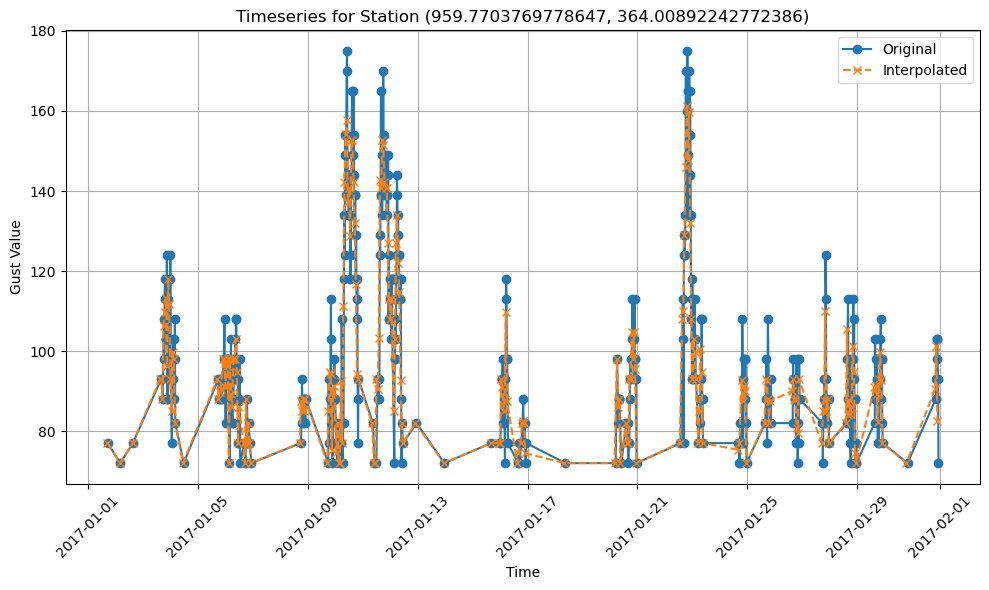

In [85]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'DATE', 'x', 'y', and 'gust'
# Also assuming 'df_interpolated' is the DataFrame with interpolated gust values

# Choose a specific station (x, y) to plot
x_station = 959.7703769778647  # Replace with the x-coordinate of your chosen station
y_station = 364.00892242772386  # Replace with the y-coordinate of your chosen station

# Select data for the chosen station
original_data = df[(df['x'] == x_station) & (df['y'] == y_station)].loc[df.DATE.dt.month == 1]
interpolated_data = df_interpolated[(df_interpolated.index.get_level_values('x') == x_station) & (df_interpolated.index.get_level_values('y') == y_station)&(df_interpolated.index.get_level_values('DATE').month == 1)]

# Plot timeseries
plt.figure(figsize=(10, 6))
plt.plot(original_data['DATE'], original_data['gust'], label='Original', marker='o')
plt.plot(interpolated_data.index.get_level_values('DATE'), interpolated_data['gust'], label='Interpolated', linestyle='--', marker='x')
plt.xlabel('Time')
plt.ylabel('Gust Value')
plt.title(f'Timeseries for Station ({x_station}, {y_station})')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

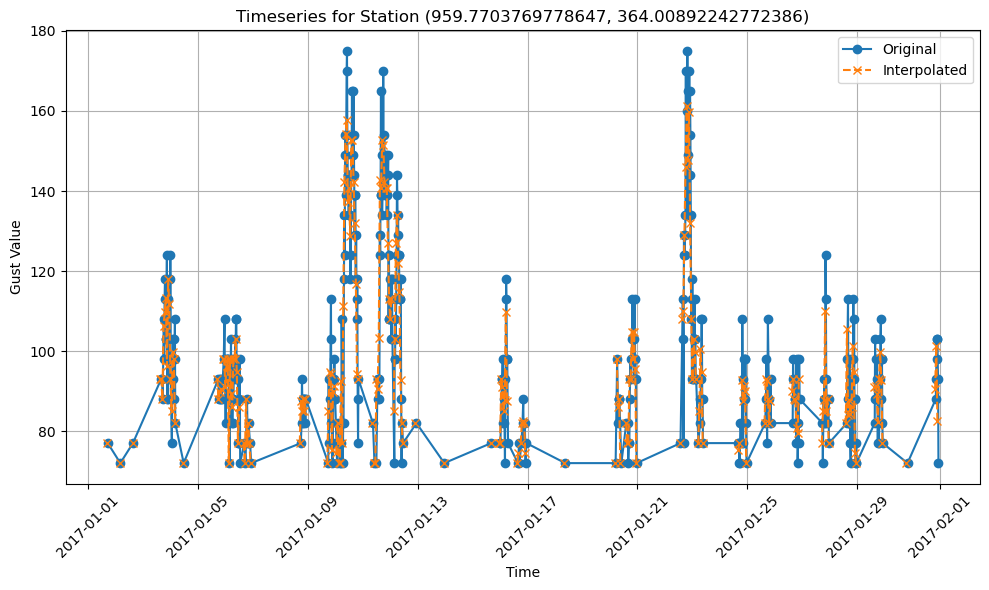

In [91]:

# Assuming 'df' is your DataFrame with columns 'DATE', 'x', 'y', and 'gust'
# Also assuming 'df_interpolated' is the DataFrame with interpolated gust values

# Choose a specific station (x, y) to plot
x_station = 959.7703769778647  # Replace with the x-coordinate of your chosen station
y_station = 364.00892242772386  # Replace with the y-coordinate of your chosen station

# Select data for the chosen station
original_data = df[(df['x'] == x_station) & (df['y'] == y_station)].loc[df.DATE.dt.month == 1]
interpolated_data = df_final[(df_final['x'] == x_station) & (df_final['y'] == y_station)&(df_final['DATE'].dt.month == 1)]

# Plot timeseries
plt.figure(figsize=(10, 6))
plt.plot(original_data['DATE'], original_data['gust'], label='Original', marker='o')
plt.plot(interpolated_data['DATE'], interpolated_data['gust'], label='Interpolated', linestyle='--', marker='x')
plt.xlabel('Time')
plt.ylabel('Gust Value')
plt.title(f'Timeseries for Station ({x_station}, {y_station})')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
df_final.set_index([ 'x', 'y','DATE',], inplace=True)

In [124]:
df_final

gust
x          y          DATE                     
838.877622 356.719266 2017-01-01 03:00:00   NaN
           360.191057 2017-01-01 03:00:00   NaN
           361.503961 2017-01-01 03:00:00   NaN
           364.008922 2017-01-01 03:00:00   NaN
           367.620826 2017-01-01 03:00:00   NaN
...                                         ...
959.770377 465.255172 2017-12-31 23:00:00   NaN
           465.301909 2017-12-31 23:00:00   NaN
           477.475160 2017-12-31 23:00:00   NaN
           479.761941 2017-12-31 23:00:00   NaN
           479.830521 2017-12-31 23:00:00   NaN

[21892500 rows x 1 columns]

In [125]:
stations_naive_grid = df_final.to_xarray()

In [1]:
stations_naive_grid

NameError: name 'stations_naive_grid' is not defined

In [193]:
import xarray as xr

# Assuming 'ds' is your xarray dataset

# Group by x and y coordinates and aggregate by mean
ds = stations_naive_grid

# Define the integer x and y positions
x_int = np.arange(ds['x'].min().round(), ds['x'].max().round() + 1)
y_int = np.arange(ds['y'].min().round(), ds['y'].max().round() + 1)

# Create a new dataset with integer x and y positions
ds_regrid = xr.Dataset(coords={'x': x_int, 'y': y_int})

# Interpolate the original dataset to the new integer x-y grid
ds_regrid['gust'] = ds['gust'].interp(x=x_int, y=y_int, method = 'nearest')


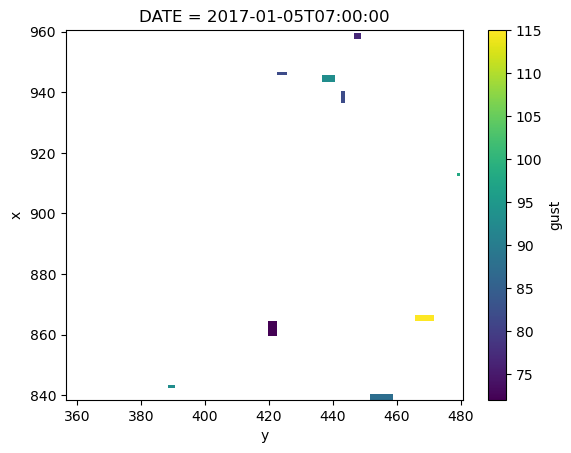

In [194]:
ds_regrid.isel({'DATE':100}).gust.plot.imshow()

In [190]:
pd.set_option('display.max_columns', 120, 'display.max_rows', 120)


In [179]:
stations_naive_grid.isel({'DATE':100}).gust.to_pandas()

y,356.719266,360.191057,361.503961,364.008922,367.620826,371.050537,373.324882,375.304067,377.244497,379.667845,383.027478,386.425121,386.808790,388.563049,388.656899,392.131196,395.403371,399.294880,402.894843,408.572792,412.583512,413.015020,413.730614,414.762003,415.971269,416.884493,417.238314,419.124594,419.610029,419.931990,424.484327,426.227285,430.905894,431.515843,434.638242,438.244690,442.459424,443.205094,444.227547,447.983080,448.800770,450.641786,453.267565,463.757242,464.229617,465.255172,465.301909,477.475160,479.761941,479.830521
x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
838.877622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841.713868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843.042003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844.355402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845.187207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847.581909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851.943807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853.670053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855.902769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
ds_regrid.isel({'DATE':100}).gust.to_pandas()

y,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,...,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0
x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
839.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.5,87.5,87.5,87.5,87.5,87.5,87.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.5,87.5,87.5,87.5,87.5,87.5,87.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

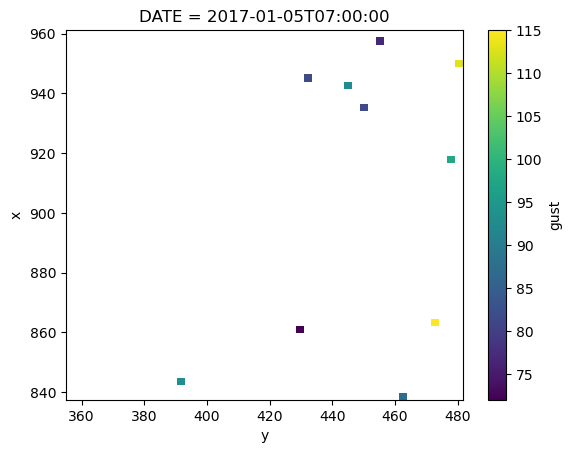

In [182]:
stations_naive_grid.isel({'DATE':100}).gust.plot.imshow()

In [ ]:
from scipy.interpolate import RegularGridInterpolator

# Assuming 'ds' is your xarray dataset
ds = stations_naive_grid


# Define the integer x and y positions
x_int = np.arange(ds['x'].min(), ds['x'].max() + 1)
y_int = np.arange(ds['y'].min(), ds['y'].max() + 1)

# Create a meshgrid of the original coordinates
x_orig, y_orig = np.meshgrid(ds['x'], ds['y'])

# Create a RegularGridInterpolator object
interp_func = RegularGridInterpolator((ds['x'], ds['y']), ds['gust'], method='nearest', bounds_error=False, fill_value=None)

# Evaluate the interpolation function at the new integer x-y grid
xx, yy = np.meshgrid(x_int, y_int)
points = np.vstack([xx.ravel(), yy.ravel()]).T
gust_interp = interp_func(points).reshape(xx.shape)

# Create a new dataset with integer x and y positions
ds_regrid = xr.Dataset(
    {
        'gust': (('y', 'x'), gust_interp)
    },
    coords={'x': x_int, 'y': y_int}
)

# Display the regridded dataset
print(ds_regrid)